# 전국어린이집표준데이터

공공데이터포털의 [표준데이터](https://www.data.go.kr/search/index.do?index=DATAGRID)에서 “어린이집”를 검색합니다.

전국어린이집표준데이터: <https://www.data.go.kr/dataset/15013108/standard.do>

여기서는 “CSV” 파일을 다운로드해 사용합니다.

## 카카오맵 API 준비

이번에는 **카카오맵 API**를 사용할 겁니다.

(API는 “[Application Programming Interface](http://j.mp/2AoFEZW)”의 약자로 프로그램 만들 때 쓸 수 있는 자원입니다.)

카카오맵 API를 사용하려면 앱을 등록하고 키를 얻어야 합니다.

### 앱 등록 및 키 얻기

1. [Kakao Developers](https://developers.kakao.com/)에 방문해서 회원 가입 및 로그인을 합니다.
1. “[내 애플리케이션](https://developers.kakao.com/apps)” 페이지로 이동합니다.
1. 왼쪽에 있는 “[앱 만들기](https://developers.kakao.com/apps/new)” 버튼을 누릅니다.
1. “앱 이름”과 “회사 이름”을 입력합니다. 저는 “dataitgirls3” 정도로 입력했습니다.
1. 입력 폼 아래에 있는 “앱 만들기” 버튼을 누르면 “앱 아이콘 확인” 창이 뜹니다. 외부에 공개하는 게 아니라 아이콘이 불필요합니다. 그냥 “계속 진행” 버튼을 누르세요.
1. “애플리케이션을 생성하였습니다” 메시지가 나오고 “네이티브 앱 키”, “REST API 키”, “JavaScript 키”, “Admin 키”가 나옵니다. 여기서 “REST API 키” 아래에 써있는 글자(`5697d147d3888c4b8891fbe694c02e79` 같은 형태입니다)를 복사합니다.

만약 다른 걸 눌러서 그 화면을 벗어났다면 “[내 애플리케이션](https://developers.kakao.com/apps)” 페이지를 통해 방금 만든 애플리케이션 관리 화면으로 가서 왼쪽에 있는 “설정” 아래에 있는 “일반” 메뉴를 선택하셔서 확인하실 수 있습니다.

## REST API 키 사용

터미널 또는 Git Bash를 실행하시고 다음을 입력해 REST API를 환경변수에 등록하고 Jupyter Notebook을 실행합니다.

```bash
# 환경변수 설정
# REST API 키를 바꿔서 사용하세요.
export KAKAO_REST_API_KEY=5697d147d3888c4b8891fbe694c02e79

# Jupyter Notebook 실행
jupyter notebook
```

In [1]:
# 자, 이제 본격 시작입니다!

## Matplotlib 준비

그래프를 그리기 위해 Plotting 라이브러리를 사용합니다.

<https://matplotlib.org/>

In [2]:
# matplotlib 모듈 사용

import matplotlib
import matplotlib.pyplot as plt

# matplotlib 버전 확인
# 버전이 다를 때 문제가 생기는 경우가 종종 있어서 이렇게 사용 중인 버전을 확인합니다.

matplotlib.__version__

'3.1.1'

## Pandas 준비

데이터를 다루기 위해 Pandas 라이브러리를 사용합니다.

Pandas를 사용하면 CSV 파일을 로딩하고, 컬럼 중심으로 데이터를 다룰 수 있습니다.

<https://pandas.pydata.org/>

In [3]:
# pandas 모듈 사용

import pandas as pd

# pandas 버전 확인

pd.__version__

'0.24.2'

## Folium 준비

인터랙티브한 지도를 표현하기 위해 folium 라이브러리를 사용합니다.

<https://python-visualization.github.io/folium/>

In [4]:
# folium 패키지 설치

!pip install folium

In [5]:
# folium 버전 확인

import folium

folium.__version__

'0.10.0'

In [6]:
# folium 라이브러리의 Map과 HeatMap 사용

from folium import Map
from folium.plugins import HeatMap

## Matplotlib의 한국어 표시 문제

Matplotlib을 쓰면 한국어가 제대로 표시되지 않는 문제가 있습니다.

여기서는 한국어 글꼴을 지정함으로써 이 문제를 해결하겠습니다.

In [7]:
# matplotlib에 “AppleGothc”(Mac) 또는 “Malgun Gothic”(Windows) 글꼴 적용

import matplotlib.font_manager as fm

for font in fm.fontManager.ttflist:
    if font.name in ['AppleGothic', 'Malgun Gothic']:
        plt.rcParams['font.family'] = font.name
        break

plt.rcParams['font.family']

['AppleGothic']

## 전국어린이집표준데이터 읽기

Pandas의 `read_csv` 함수를 이용해 CSV 파일을 읽습니다.

공공데이터는 예전에 구축한 시스템의 “EUC-KR” 인코딩을 사용하는 경우가 많습니다.

In [8]:
# EUC-KR 인코딩으로 CSV 파일 읽기

df = pd.read_csv('data/child-house.csv', encoding='euc-kr', low_memory=False)

## 데이터 첫인상 확인

일단 데이터가 어떻게 생겼는지 확인합니다.

In [9]:
# 1. 컬럼 목록

df.columns

Index(['어린이집명', '시도명', '시군구명', '어린이집유형구분', '정원수', '보육교직원수', '소재지도로명주소',
       '어린이집전화번호', '어린이집팩스번호', '보육실수', '놀이터수', 'CCTV설치수', '통학차량운영여부', '홈페이지주소',
       '데이터기준일자', '제공기관코드', '제공기관명', 'Unnamed: 17'],
      dtype='object')

In [10]:
# 2. 전체 갯수와 컬럼 갯수 확인

df.shape

(48178, 18)

In [11]:
# 3. 데이터 일부 확인

df.head()

,어린이집명,시도명,시군구명,어린이집유형구분,정원수,보육교직원수,소재지도로명주소,어린이집전화번호,어린이집팩스번호,보육실수,놀이터수,CCTV설치수,통학차량운영여부,홈페이지주소,데이터기준일자,제공기관코드,제공기관명,Unnamed: 17
0,노아키즈어린이집,강원도,원주시,가정,20,5.0,"강원도 원주시 시청로 496-1 101동 102호(관설동, 코아루아파트)",033-742-1295,NaN,0.0,0.0,0.0,,NaN,2018-07-31,6420000,강원도,NaN
1,놀러와어린이집,강원도,원주시,가정,20,4.0,"강원도 원주시 봉화로 231 210동 103호 (우산동, 한라비발디2차아파트)",033-764-7600,NaN,0.0,0.0,0.0,,NaN,2018-07-31,6420000,강원도,NaN
2,꿈꾸는 어린이집,강원도,강릉시,가정,10,2.0,"강원도 강릉시 성덕포남로 89-17 503동 106호(입암동, 입암5주공아파트)",033-651-1555,NaN,2.0,0.0,3.0,N,NaN,2018-07-31,6420000,강원도,NaN
3,꿈꾸미 어린이집,강원도,강릉시,가정,18,4.0,강원도 강릉시 경강로2301번길 22 강릉7차아파트 A동 106호 (포남동),070-4098-4292,NaN,3.0,0.0,0.0,N,NaN,2018-07-31,6420000,강원도,NaN
4,꼬마대통령어린이집,강원도,동해시,가정,20,4.0,강원도 동해시 평원로 107 엘리시아 아파트 105동104호,033-533-5866,NaN,3.0,0.0,4.0,Y,NaN,2018-07-31,6420000,강원도,NaN


## 불필요한 컬럼 제거

결측값이 너무 많거나 당장에 필요하지 않은 컬럼을 정리합니다.

In [12]:
# 컬럼별 결측값 갯수 확인

data = df.isnull().sum()

pd.DataFrame(data)

,0
어린이집명,0
시도명,0
시군구명,0
어린이집유형구분,0
정원수,0
보육교직원수,241
소재지도로명주소,4253
어린이집전화번호,0
어린이집팩스번호,24549
보육실수,12066


In [13]:
# 안 쓰는 컬럼 이름을 넣어 drop해서 simple 데이터를 만듭니다.

simple_df = df.drop(columns=[
    '어린이집전화번호', '어린이집팩스번호',
    '보육실수', '놀이터수', 'CCTV설치수', '통학차량운영여부', '홈페이지주소',
    '데이터기준일자', '제공기관코드', '제공기관명', 'Unnamed: 17'
])

# 정리된 데이터 확인

simple_df.head()

,어린이집명,시도명,시군구명,어린이집유형구분,정원수,보육교직원수,소재지도로명주소
0,노아키즈어린이집,강원도,원주시,가정,20,5.0,"강원도 원주시 시청로 496-1 101동 102호(관설동, 코아루아파트)"
1,놀러와어린이집,강원도,원주시,가정,20,4.0,"강원도 원주시 봉화로 231 210동 103호 (우산동, 한라비발디2차아파트)"
2,꿈꾸는 어린이집,강원도,강릉시,가정,10,2.0,"강원도 강릉시 성덕포남로 89-17 503동 106호(입암동, 입암5주공아파트)"
3,꿈꾸미 어린이집,강원도,강릉시,가정,18,4.0,강원도 강릉시 경강로2301번길 22 강릉7차아파트 A동 106호 (포남동)
4,꼬마대통령어린이집,강원도,동해시,가정,20,4.0,강원도 동해시 평원로 107 엘리시아 아파트 105동104호


## 기본적인 분류

데이터가 어떻게 분류되어 있는지 확인합니다.

In [14]:
# “어린이집유형구분” 컬럼에 있는 값의 갯수를 확인

data = simple_df['어린이집유형구분'].value_counts()

pd.DataFrame(data)

,어린이집유형구분
가정,22206
민간,17058
국공립,4168
사회복지법인,2235
직장,1335
법인·단체,995
협동,181


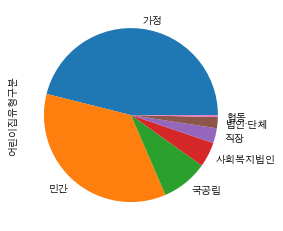

In [15]:
# 파이 그래프

data = simple_df['어린이집유형구분'].value_counts()

data.plot.pie()

plt.show()

In [16]:
# “시도명”도 똑같이 처리

data = simple_df['시도명'].value_counts()

pd.DataFrame(data)

,시도명
경기도,9350
경상남도,5564
서울특별시,4717
충청남도,3702
광주광역시,3515
경상북도,3355
대구광역시,2656
전라북도,2593
강원도,2254
인천광역시,2102


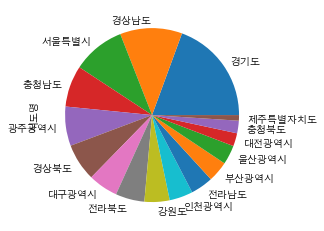

In [17]:
# 파이 그래프

data = simple_df['시도명'].value_counts()

data.plot.pie()

plt.show()

In [18]:
# “시군구명”도 똑같이 처리. 너무 많아서 상위 20개만 표시.

data = simple_df['시군구명'].value_counts().nlargest(20)

pd.DataFrame(data)

,시군구명
북구,2062
서구,1847
천안시,1348
광산구,1281
수원시,1136
김해시,1122
남구,1121
구미시,960
동구,934
아산시,852


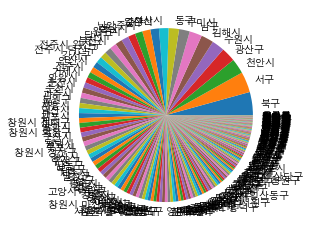

In [19]:
# 파이 그래프

data = simple_df['시군구명'].value_counts()

data.plot.pie()

plt.show()

이렇게 많은 걸 파이 그래프로 그리면 지옥을 볼 수 있습니다.

## 분포 확인

데이터가 어떤 식으로 분포됐는지 히스토그램을 그려보면 알 수 있습니다.

In [20]:
# “정원수” 확인

data = simple_df['정원수'].value_counts()

pd.DataFrame(data)

,정원수
20,11135
19,5588
49,1592
39,1587
13,1358
99,1076
16,1071
18,1035
17,918
15,700


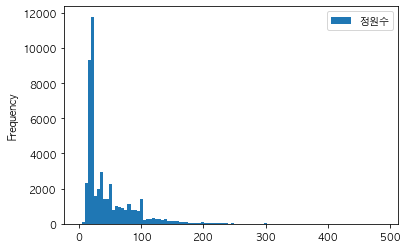

In [21]:
# 히스토그램 표시

simple_df[['정원수']].plot.hist(bins=100)

plt.show()

In [22]:
# “보육교직원수” 확인

data = simple_df['보육교직원수'].value_counts().nlargest(20)

pd.DataFrame(data)

,보육교직원수
6.0,7634
5.0,6934
7.0,4704
4.0,4465
8.0,3342
9.0,2835
10.0,2484
3.0,2477
11.0,1836
12.0,1566


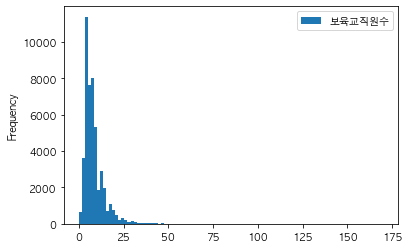

In [23]:
# 히스토그램 표시

simple_df[['보육교직원수']].plot.hist(bins=100)

plt.show()

## 주소 확인

주소 정보는 완전 개별적이지만 활용할 방법이 있습니다.

In [24]:
# 결측값을 제외합니다.

address_df = simple_df[simple_df['소재지도로명주소'].notnull()]

# 데이터 갯수가 어떻게 바뀌는지 확인합니다.

simple_df.shape, address_df.shape

((48178, 7), (43925, 7))

48178 -> 43925

“소재지도로명주소”에 있던 결측값 4253개를 정리한 걸 알 수 있습니다.

### 위도, 경도 얻기

전국어린이집표준데이터엔 위도와 경도 정보가 없습니다.

카카오맵 API를 이용해 주소 검색해 위도와 경도를 얻을 수 있습니다.

여기서는 `geocoder.py` 파일에 작성한 `geocode` 함수를 사용합니다.

In [25]:
# 주소 확인

address_df['소재지도로명주소'][0]

'강원도 원주시 시청로 496-1 101동 102호(관설동, 코아루아파트)'

In [26]:
# 위도, 경도 얻기

from geocoder import geocode

geocode('강원도 원주시 시청로 496-1 101동 102호(관설동, 코아루아파트)')

(37.31397292792154, 127.96216997926722)

In [27]:
# API 호출 및 지도에 표시하는 작업을 원활히 하기 위해 자료를 500개로 제한해서 sample 데이터를 만듭니다.

sample_df = simple_df.sample(n=500, random_state=1)

sample_df.shape

(500, 7)

In [28]:
# 위도, 경도를 저장할 리스트 준비
lats = []
lngs = []

# Accumulation
for i, index in enumerate(sample_df.index):
    # 진행 상황 표시
    print(i + 1, '-', index)
    # 위도, 경도 얻기
    lat, lng = geocode(df['소재지도로명주소'][index])
    # 위도, 경도 추가 (올바르지 않으면 0으로 처리)
    lats.append(lat or 0)
    lngs.append(lng or 0)

# 컬럼 추가
sample_df = sample_df.assign(위도=lats, 경도=lngs)

# 간단히 확인
sample_df.head()

1 - 4249
2 - 37096
3 - 27918
4 - 33058
5 - 4117
6 - 45006
7 - 43107
8 - 14434
9 - 12966
10 - 36255
11 - 22379
12 - 11547
13 - 47287
14 - 46504
15 - 6257
16 - 487
17 - 21640
18 - 40344
19 - 38817
20 - 9300
21 - 31697
22 - 1974
23 - 18813
24 - 11223
25 - 31934
26 - 391
27 - 2039
28 - 26614
29 - 47302
30 - 45640
31 - 19701
32 - 21234
33 - 4465
34 - 40886
35 - 23089
36 - 47806
37 - 4046
38 - 43385
39 - 46950
40 - 15357
41 - 21104
42 - 2207
43 - 5604
44 - 20190
45 - 23871
46 - 46183
47 - 45748
48 - 46792
49 - 6826
50 - 35629
51 - 28858
52 - 41478
53 - 17769
54 - 10947
55 - 30110
56 - 25404
57 - 5601
58 - 40331
59 - 15661
60 - 27850
61 - 6847
62 - 44664
63 - 7771
64 - 38525
65 - 30418
66 - 34815
67 - 12569
68 - 16923
69 - 44886
70 - 19866
71 - 5024
72 - 18340
73 - 23146
74 - 3963
75 - 38758
76 - 24246
77 - 32596
78 - 11251
79 - 8380
80 - 2551
81 - 14040
82 - 9086
83 - 9350
84 - 1944
85 - 34315
86 - 31722
87 - 407
88 - 31185
89 - 5068
90 - 39878
91 - 34661
92 - 20885
93 - 44021
94 - 9772
95 -

,어린이집명,시도명,시군구명,어린이집유형구분,정원수,보육교직원수,소재지도로명주소,위도,경도
4249,신나는 어린이집,충청남도,당진시,가정,20,4.0,충청남도 당진시 당진중앙2로 212-10 2동 105호( 읍내동 25-6 2동 105호),36.895987,126.635300
37096,현대미포조선어린이집,울산광역시,동구,직장,42,5.0,울산광역시 동구 문현1길 1 문현관3동 1층 (방어동),35.487157,129.414435
27918,꼬망새어린이집,전라북도,익산시,가정,15,6.0,전라북도 익산시 고봉로34길 5-2,35.960953,126.972251
33058,작은숲 키큰나무어린이집,경상남도,진주시,가정,20,5.0,"경상남도 진주시 새평거로 111 312동 102호 (평거동, 평거휴먼시아3단지)",35.170494,128.059159
4117,드림아이어린이집,부산광역시,북구,가정,19,4.0,"부산광역시 북구 금곡대로 166 103동 103호(화명동, 롯데캐슬카이저)",35.222505,129.011338


## 지도 그리기

위도/경도 데이터를 얻었기 때문에 지도에 그려볼 수 있습니다.

In [29]:
# 위도, 경도만 모읍니다.

coordinates = sample_df[['위도', '경도']]

coordinates

,위도,경도
4249,36.895987,126.635300
37096,35.487157,129.414435
27918,35.960953,126.972251
33058,35.170494,128.059159
4117,35.222505,129.011338
45006,35.219469,128.688486
43107,37.452419,126.891842
14434,36.139884,128.430643
12966,35.804748,129.498872
36255,35.873247,128.727463


In [30]:
# 지도 다시 준비

map = Map(location=[36.5, 127.5], zoom_start=7)

# 지도에 위치 표시

for lat, lng in coordinates.values:
    marker = folium.Circle(
        location=[lat, lng],
        radius=5_000,
        weight=1,
        fill_color='#F00',
        fill_opacity=0.3,
    )
    marker.add_to(map)

map

In [31]:
# 지도 다시 준비

map = Map(location=[36.5, 127.5], zoom_start=7)

# 히트맵 표시

HeatMap(data=coordinates, radius=20).add_to(map)

map